In [1]:
import pandas as pd
peakinf = []

In [2]:
df = pd.read_csv('/Users/spenc/OneDrive/Documents/University_of_Utah/2019-2020/DataScience/COMP5360Project/project_files/csv_files/CLEANCDRdata.csv')

In [ ]:
df = pd.read_csv(r'C:\Users\austi\Documents\GitHub\COMP5360Project\project_files\csv_files\CLEANCDRdata.csv')

In [ ]:
df = pd.read_csv('/Users/markomiholjcic/Documents/GitHub/COMP5360Project/project_files/csv_files/CLEANCDRdata.csv')

In [3]:
from datetime import datetime
Dates = df.groupby("Last Update")
df1 = Dates.count()

df1 = list(df1.index.values)
df1.sort(key = lambda date: datetime.strptime(date, '%m/%d/%Y'))

dfDate = pd.DataFrame(df1)
dfDate

,0
0,1/22/2020
1,1/23/2020
2,1/24/2020
3,1/25/2020
4,1/26/2020
...,...
86,4/17/2020
87,4/18/2020
88,4/19/2020
89,4/20/2020


In [4]:
China = df[df["Country/Region"] == "China"]  
China
dChina = China.groupby("Last Update")
dChina = dChina.sum()
dChina
dChina = list(dChina["Confirmed"].values)
dChina.sort()
dChina

ChinaCases = pd.DataFrame({"China": dChina})

ChinaCases
ChinaCases = pd.concat([dfDate,ChinaCases], axis=1, sort = False)
ChinaCases
ChinaCases = ChinaCases.rename(columns={0: "Date"})
ChinaCases

,Date,China
0,1/22/2020,547
1,1/23/2020,639
2,1/24/2020,916
3,1/25/2020,1399
4,1/26/2020,2062
...,...,...
86,4/17/2020,79574
87,4/18/2020,79588
88,4/19/2020,79749
89,4/20/2020,79771


In [6]:
FMT = '%m/%d/%Y'
days = ChinaCases['Date']
numday = []
from datetime import datetime 
for a in days:
    diff = (datetime.strptime(a, FMT) - datetime.strptime("1/21/2020", FMT))
    x = diff.days
    numday.append(x)
numday
#ChinaCases['Date'] = days.map(lambda x : (datetime.strptime(x, FMT) - datetime.strptime("1/21/20", FMT)).days  )

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91]

In [7]:
import numpy as np
def LogisticModel(x,v,t,c):
    return c/(1+np.exp(-(x-t)/v))

In [8]:
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
import math
Day = numday
Cases = list(ChinaCases.iloc[:,1])

plt.plot(Day, Cases, label="COVID-19 Data")

fit = curve_fit(LogisticModel,Day,Cases,p0=[2,30,75000])
params = fit[0]
v = params[0]
t = params[1]
c = params[2]

print(v)
print(t)
print(c)
infcases=ChinaCases['China'].iloc[int(t)]
peakinf.append(math.ceil(infcases))

import math
finishday = t
finishday = math.ceil(finishday)
startdate = "01/21/2020"

enddate = pd.to_datetime(startdate) + pd.DateOffset(days=finishday)
print("Day of Inflection: " + str(enddate))

sol = int(fsolve(lambda Day : LogisticModel(Day,v,t,c) - int(c),t))
sol

startdate = "01/21/2020"
enddate = pd.to_datetime(startdate) + pd.DateOffset(days=sol)
print("End of the Infection: " + str(enddate))

pred_x = list(range(max(Day),sol))
pred_x

Pred = [LogisticModel(i,v,t,c) for i in Day+pred_x]

plt.plot(Day+pred_x, Pred, label="Model Prediction")
plt.title("China Logistic Model")
plt.xlabel("Days since Outbreak"); plt.ylabel("Number of Cases")
plt.legend()

4.298432924058947
18.226264933873047
76984.67446008258
Day of Inflection: 2020-02-09 00:00:00
End of the Infection: 2020-03-29 00:00:00


In [9]:
import math
finishday = t
finishday = math.ceil(finishday)
startdate = "01/21/2020"
enddate = pd.to_datetime(startdate) + pd.DateOffset(days=finishday)
print("Day of Inflection: " + str(enddate))

Day of Inflection: 2020-02-09 00:00:00


In [10]:
Daystoend = int(fsolve(lambda Day : LogisticModel(Day,v,t,c) - int(c),t))
Daystoend
startdate = "01/21/2020"
enddate = pd.to_datetime(startdate) + pd.DateOffset(days=Daystoend)
print("End of the Infection: " + str(enddate))

End of the Infection: 2020-03-29 00:00:00


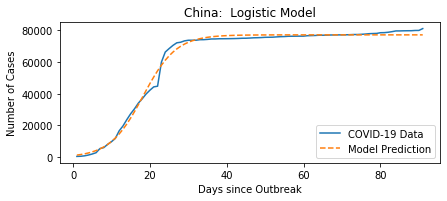

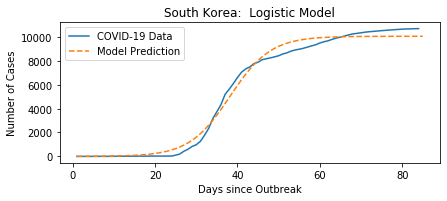

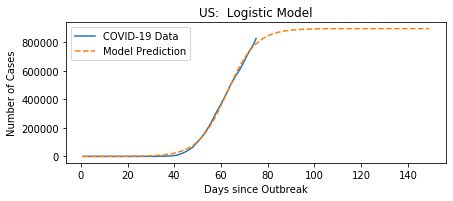

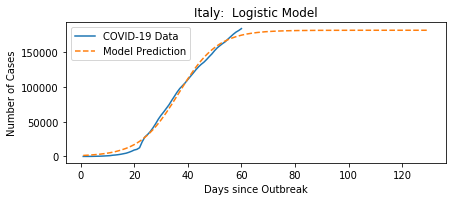

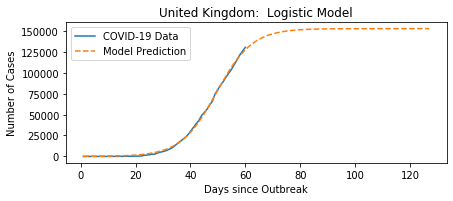

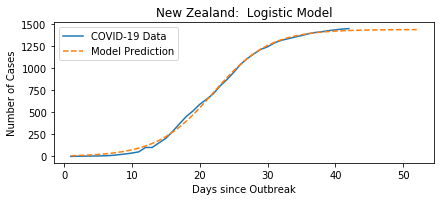

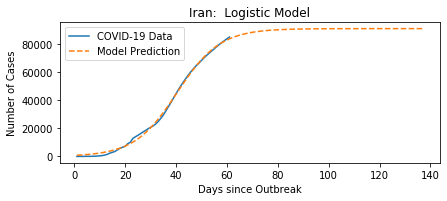

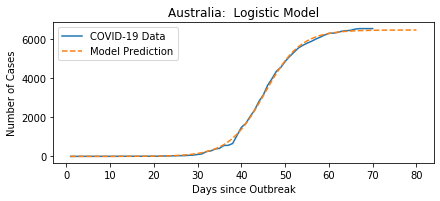

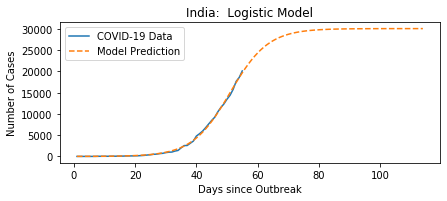

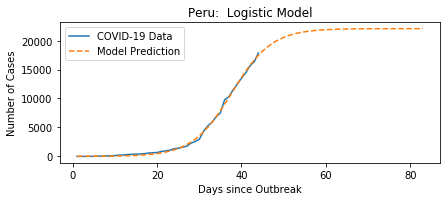

In [76]:
from datetime import datetime
peakinf = []
inflection = []
end = []
rsq = []

df = pd.read_csv('/Users/spenc/OneDrive/Documents/University_of_Utah/2019-2020/DataScience/COMP5360Project/project_files/csv_files/CLEANCDRdata.csv')
Dates = df.groupby("Last Update")
df1 = Dates.count()

countries = ["China","South Korea","US","Italy","United Kingdom","New Zealand","Iran","Australia","India","Peru"]
for nat in countries:
        
    Dates = list(df1.index.values)
    Dates.sort(key = lambda date: datetime.strptime(date, '%m/%d/%Y'))
    country = df[df["Country/Region"] == nat]
    
    dCountry = country.groupby("Last Update")
    dCountry = dCountry.sum()
    dCountry= list(dCountry["Confirmed"].values)
    dCountry.sort()
    
    length = len(dCountry)
    dfDate = pd.DataFrame(Dates[0:length])
    
    Cases = pd.DataFrame({"name": dCountry})
    Cases = pd.concat([dfDate,Cases], axis=1, sort = False)
    Cases = Cases.rename(columns={0:"Date"})
    
    FMT = '%m/%d/%Y'
    days = Cases['Date']
    numday = []
    
    
    for a in days:
        diff = (datetime.strptime(a, FMT) - datetime.strptime("1/21/2020", FMT))
        x = diff.days
        numday.append(x)
    
    Day = numday
    Cases = list(Cases.iloc[:,1])
    
    import numpy as np
    def LogisticModel(x,v,t,c):
        return c/(1+np.exp(-(x-t)/v))
    
    fit = curve_fit(LogisticModel,Day,Cases,p0=[2,30,75000])
    params = fit[0]
    v = params[0]
    t = params[1]
    c = params[2]

    peakinf.append(int(c))
    
    import math
    
    finishday = t
    finishday = math.ceil(finishday)
    startdate = "01/21/2020"
    startdate = pd.to_datetime(startdate) + pd.DateOffset(days=(91-len(numday)))
    inflectiondate = pd.to_datetime(startdate) + pd.DateOffset(days=finishday)
    eday = int(fsolve(lambda Day : LogisticModel(Day,v,t,c) - int(c),t))
    eday

    enddate = pd.to_datetime(startdate) + pd.DateOffset(days=sol)
    
    inflection.append(inflectiondate)
    end.append(enddate)
    
   
    
    title=str(nat)
    
    pred_x = list(range(max(Day),eday))
    
    Pred = [LogisticModel(i,v,t,c) for i in Day+pred_x]
    
    Pred_Cases = Pred[:len(Day)]
    
    corr_mat = np.corrcoef(Cases, Pred_Cases)
    correlation = corr_mat[0,1]
    rsquare = correlation**2
    rsq.append(rsquare)
    
    fig= plt.figure(figsize=(15,15))
    a = plt.subplot(5,2, countries.index(nat)+1)
    plt.plot(Day, Cases, label="COVID-19 Data")
    plt.plot(Day+pred_x, Pred, label="Model Prediction", linestyle="dashed")
    plt.title(title+':  Logistic Model')
    plt.xlabel("Days since Outbreak"); plt.ylabel("Number of Cases")
    plt.legend()



In [77]:
Names = pd.DataFrame({"Country": countries})
numinfec = pd.DataFrame({"Peak Infections": peakinf})
inflecday = pd.DataFrame({"Projected Inflection Date": inflection})
endday = pd.DataFrame({"Projected End Date": end})
error = pd.DataFrame({"R-Squared": rsq})
data = pd.concat([Names,numinfec,inflecday,endday,error], axis=1, sort = False)
data


,Country,Peak Infections,Projected Inflection Date,Projected End Date,R-Squared
0,China,76984,2020-02-09,2020-03-29,0.992952
1,South Korea,10042,2020-03-07,2020-04-23,0.990097
2,US,893243,2020-04-09,2020-07-05,0.998320
3,Italy,181579,2020-03-29,2020-07-01,0.995020
4,United Kingdom,152555,2020-04-11,2020-06-28,0.999169
5,New Zealand,1434,2020-04-01,2020-05-02,0.998684
6,Iran,90769,2020-04-01,2020-07-07,0.998290
7,Australia,6475,2020-03-28,2020-05-02,0.999380
8,India,30018,2020-04-18,2020-06-20,0.998740
9,Peru,22060,2020-04-15,2020-05-31,0.998141


In [19]:
from datetime import datetime
peakinf = []
inflection = []
end = []

df = pd.read_csv('/Users/spenc/OneDrive/Documents/University_of_Utah/2019-2020/DataScience/COMP5360Project/project_files/csv_files/CLEANCDRdata.csv')
Dates = df.groupby("Last Update")
df1 = Dates.count()

countries = ["China","South Korea","US","Italy","United Kingdom","New Zealand","Iran","Australia","India","Peru"]
#for x in country:
        
Dates = list(df1.index.values)
country = df[df["Country/Region"] == "China"]    
dCountry = country.groupby("Last Update")
dCountry = dCountry.sum()
dCountry= list(dCountry["Confirmed"].values)
    
length = len(dCountry)
dfDate = pd.DataFrame(Dates[0:length])
    
Cases = pd.DataFrame({"name": dCountry})
Cases = pd.concat([dfDate,Cases], axis=1, sort = False)
Cases = Cases.rename(columns={0:"Date"})
    
FMT = '%m/%d/%Y'
days = Cases['Date']
numday = []
    
    

KeyError: 'Date'

In [ ]:
#df = pd.read_csv(r'C:\Users\austi\Documents\GitHub\COMP5360Project\project_files\csv_files\CLEANCDRdata.csv')
df = pd.read_csv('/Users/spenc/OneDrive/Documents/University_of_Utah/2019-2020/DataScience/COMP5360Project/project_files/csv_files/CLEANCDRdata.csv')
from datetime import datetime
Dates = df.groupby("Last Update")
df1 = Dates.count()

df1 = list(df1.index.values)
df1.sort(key = lambda date: datetime.strptime(date, '%m/%d/%y'))


SK = df[df["Country/Region"] == "South Korea"]  
SK
dSK = list(SK["Confirmed"].values)
dSK.sort()
length = len(dSK)

dfDate = pd.DataFrame(df1[0:length])
dfDate

SKCases = pd.DataFrame({"South Korea": dSK})

SKCases
SKCases = pd.concat([dfDate,SKCases], axis=1, sort = False)
SKCases
SKCases = SKCases.rename(columns={0: "Date"})
SKCases

FMT = '%m/%d/%y'
days = SKCases['Date']
numday = []
from datetime import datetime 
for a in days:
    x = a
    y = (datetime.strptime(x, FMT) - datetime.strptime("1/21/20", FMT))
    z = y.days
    numday.append(z)
numday

In [ ]:
Day = numday
Cases = list(SKCases.iloc[:,1])

plt.plot(Day, Cases, label="COVID-19 Data")

fit = curve_fit(LogisticModel,Day,Cases,p0=[2,30,75000])
params = fit[0]
v = params[0]
t = params[1]
c = params[2]

print(v)
print(t)
print(c)
infcases=SKCases['South Korea'].iloc[int(t)]
peakinf.append(math.ceil(infcases))

import math
finishday = t
finishday = math.ceil(finishday)
startdate = "01/21/2020"
startdate = pd.to_datetime(startdate) + pd.DateOffset(days=(67-len(numday)))
startdate

enddate = pd.to_datetime(startdate) + pd.DateOffset(days=finishday)
print("Day of Inflection: " + str(enddate))

sol = int(fsolve(lambda Day : LogisticModel(Day,v,t,c) - int(c),t))
sol

startdate = "01/21/2020"
enddate = pd.to_datetime(startdate) + pd.DateOffset(days=sol)
print("End of the Infection: " + str(enddate))

pred_x = list(range(max(Day),sol))
pred_x

Pred = [LogisticModel(i,v,t,c) for i in Day+pred_x]

plt.plot(Day+pred_x, Pred, label="Model Prediction")

plt.title("South Korea Logistic Model")
plt.xlabel("Days since Outbreak"); plt.ylabel("Number of Cases")
plt.legend()

In [ ]:
import math
finishday = t
finishday = math.ceil(finishday)
startdate = "01/21/2020"
enddate = pd.to_datetime(startdate) + pd.DateOffset(days=finishday)
print("Day of Inflection: " + str(enddate))

sol = int(fsolve(lambda Day : LogisticModel(Day,v,t,c) - int(c),t))
sol
startdate = "01/21/2020"
enddate = pd.to_datetime(startdate) + pd.DateOffset(days=sol)
print("End of the Infection: " + str(enddate))

In [55]:
df = pd.read_csv('/Users/spenc/OneDrive/Documents/University_of_Utah/2019-2020/DataScience/COMP5360Project/project_files/csv_files/CLEANCDRdata.csv')

from datetime import datetime
Dates = df.groupby("Last Update")
df1 = Dates.count()

df1 = list(df1.index.values)
df1.sort(key = lambda date: datetime.strptime(date, '%m/%d/%Y'))

USA = df[df["Country/Region"] == "US"]  
USA
dUS = USA.groupby("Last Update")
dUS = dUS.sum()
dUS

dUS = list(dUS["Confirmed"].values)
dUS.sort()
dUS

length = len(dUS)
length

dfDate = pd.DataFrame(df1[0:length])
dfDate

USCases = pd.DataFrame({"US": dUS})
USCases
USCases = pd.concat([dfDate,USCases], axis=1, sort = False)
USCases
USCases = USCases.rename(columns={0: "Date"})
USCases

FMT = '%m/%d/%Y'
days = USCases['Date']
numday = []
from datetime import datetime 
for a in days:
    x = a
    y = (datetime.strptime(x, FMT) - datetime.strptime("1/21/2020", FMT))
    z = y.days
    numday.append(z)
numday

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75]

6.21078701168265
62.5890588525405
893243.6302087845
Day of Inflection: 2020-04-09 00:00:00
End of the Infection: 2020-06-19 00:00:00


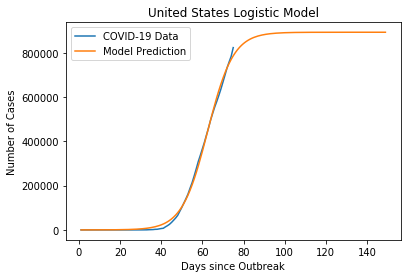

In [56]:
Day = numday
Cases = list(USCases.iloc[:,1])

plt.plot(Day, Cases, label="COVID-19 Data")

fit = curve_fit(LogisticModel,Day,Cases,p0=[2,30,75000])
params = fit[0]
v = params[0]
t = params[1]
c = params[2]

print(v)
print(t)
print(c)
infcases=USCases['US'].iloc[int(t)]
peakinf.append(math.ceil(infcases))
peakinf.append(math.ceil(c))

import math
finishday = t
finishday = math.ceil(finishday)
startdate = "01/21/2020"
startdate = pd.to_datetime(startdate) + pd.DateOffset(days=(91-len(numday)))
startdate

enddate = pd.to_datetime(startdate) + pd.DateOffset(days=finishday)
print("Day of Inflection: " + str(enddate))

sol = int(fsolve(lambda Day : LogisticModel(Day,v,t,c) - int(c),t))
sol

startdate = "01/21/2020"
enddate = pd.to_datetime(startdate) + pd.DateOffset(days=sol)
print("End of the Infection: " + str(enddate))

pred_x = list(range(max(Day),sol))
pred_x

Pred = [LogisticModel(i,v,t,c) for i in Day+pred_x]

plt.plot(Day+pred_x, Pred, label="Model Prediction")
plt.title("United States Logistic Model")
plt.xlabel("Days since Outbreak"); plt.ylabel("Number of Cases")
plt.legend()

In [ ]:

from datetime import datetime
Dates = df.groupby("Last Update")
df1 = Dates.count()

df1 = list(df1.index.values)
df1.sort(key = lambda date: datetime.strptime(date, '%m/%d/%y'))

ITA = df[df["Country/Region"] == "Italy"]  
dItaly = ITA.groupby("Last Update")
dItaly = dItaly.sum()
dItaly

dItaly = list(dItaly["Confirmed"].values)
dItaly.sort()
dItaly

length = len(dItaly)
length

dfDate = pd.DataFrame(df1[0:length])
dfDate

ITACases = pd.DataFrame({"Italy": dItaly})
ITACases
ITACases = pd.concat([dfDate,ITACases], axis=1, sort = False)
ITACases
ITACases = ITACases.rename(columns={0: "Date"})
ITACases

FMT = '%m/%d/%y'
days = ITACases['Date']
numday = []
from datetime import datetime 
for a in days:
    x = a
    y = (datetime.strptime(x, FMT) - datetime.strptime("1/21/20", FMT))
    z = y.days
    numday.append(z)
numday

In [ ]:
Day = numday
Cases = list(ITACases.iloc[:,1])

plt.plot(Day, Cases, label="COVID-19 Data")

fit = curve_fit(LogisticModel,Day,Cases,p0=[2,30,75000])
params = fit[0]
v = params[0]
t = params[1]
c = params[2]

print(v)
print(t)
print(c)
infcases=ITACases['Italy'].iloc[int(t)]
peakinf.append(math.ceil(infcases))

import math
finishday = t
finishday = math.ceil(finishday)
startdate = "01/21/2020"
startdate = pd.to_datetime(startdate) + pd.DateOffset(days=(67-len(numday)))
startdate

enddate = pd.to_datetime(startdate) + pd.DateOffset(days=finishday)
print("Day of Inflection: " + str(enddate))

sol = int(fsolve(lambda Day : LogisticModel(Day,v,t,c) - int(c),t))
sol

startdate = "01/21/2020"
enddate = pd.to_datetime(startdate) + pd.DateOffset(days=sol)
print("End of the Infection: " + str(enddate))

pred_x = list(range(max(Day),sol))
pred_x

Pred = [LogisticModel(i,v,t,c) for i in Day+pred_x]

plt.plot(Day+pred_x, Pred, label="Model Prediction")
plt.title("Italy Logistic Model")
plt.xlabel("Days since Outbreak"); plt.ylabel("Number of Cases")
plt.legend()

In [54]:

from datetime import datetime
Dates = df.groupby("Last Update")
df1 = Dates.count()

df1 = list(df1.index.values)
df1.sort(key = lambda date: datetime.strptime(date, '%m/%d/%y'))

UK = df[df["Country/Region"] == "United Kingdom"]  
dUK = UK.groupby("Last Update")
dUK = dUK.sum()
dUK

dUK = list(dUK["Confirmed"].values)
dUK.sort()
dUK

length = len(dUK)
length

dfDate = pd.DataFrame(df1[0:length])
dfDate

UKCases = pd.DataFrame({"United Kingdom": dUK})
UKCases
UKCases = pd.concat([dfDate,UKCases], axis=1, sort = False)
UKCases
UKCases = UKCases.rename(columns={0: "Date"})
print(UKCases)

FMT = '%m/%d/%y'
days = UKCases['Date']
numday = []
from datetime import datetime 
for a in days:
    x = a
    y = (datetime.strptime(x, FMT) - datetime.strptime("1/21/20", FMT))
    z = y.days
    numday.append(z)
numday

Day = numday
Cases = list(UKCases.iloc[:,1])
plt.plot(Day, Cases, label="COVID-19 Data")

fit = curve_fit(LogisticModel,Day,Cases,p0=[2,30,75000])
params = fit[0]
v = params[0]
t = params[1]
c = params[2]

print(v)
print(t)
print(c)
infcases=Cases[int(t)-5]
peakinf.append(math.ceil(infcases))

import math
finishday = t
finishday = math.ceil(finishday)
startdate = "01/21/2020"
startdate = pd.to_datetime(startdate) + pd.DateOffset(days=(67-len(numday)))
startdate

enddate = pd.to_datetime(startdate) + pd.DateOffset(days=finishday)
print("Day of Inflection: " + str(enddate))

sol = int(fsolve(lambda Day : LogisticModel(Day,v,t,c) - int(c),t))
sol


enddate = pd.to_datetime(startdate) + pd.DateOffset(days=sol)
print("End of the Infection: " + str(enddate))

pred_x = list(range(max(Day),sol))
pred_x

Pred = [LogisticModel(i,v,t,c) for i in Day+pred_x]

plt.plot(Day+pred_x, Pred, label="Model Prediction")
plt.title("United Kingdom Logistic Model")
plt.xlabel("Days since Outbreak"); plt.ylabel("Number of Cases")
plt.legend()

ValueError: unconverted data remains: 20

In [ ]:

from datetime import datetime
Dates = df.groupby("Last Update")
df1 = Dates.count()

df1 = list(df1.index.values)
df1.sort(key = lambda date: datetime.strptime(date, '%m/%d/%y'))

NZ = df[df["Country/Region"] == "New Zealand"]  
dNZ = NZ.groupby("Last Update")
dNZ = dNZ.sum()
dNZ

dNZ = list(dNZ["Confirmed"].values)
dNZ.sort()
dNZ

length = len(dNZ)
length

dfDate = pd.DataFrame(df1[0:length])
dfDate

NZCases = pd.DataFrame({"New Zealand": dNZ})
NZCases
NZCases = pd.concat([dfDate,NZCases], axis=1, sort = False)
NZCases
NZCases = NZCases.rename(columns={0: "Date"})
NZCases

FMT = '%m/%d/%y'
days = NZCases['Date']
numday = []
from datetime import datetime 
for a in days:
    x = a
    y = (datetime.strptime(x, FMT) - datetime.strptime("1/21/20", FMT))
    z = y.days
    numday.append(z)
numday

Day = numday
Cases = list(NZCases.iloc[:,1])

plt.plot(Day, Cases, label="COVID-19 Data")

fit = curve_fit(LogisticModel,Day,Cases,p0=[2,30,75000])
params = fit[0]
v = params[0]
t = params[1]
c = params[2]

print(v)
print(t)
print(c)


infcases=Cases[int(t)]
peakinf.append(math.ceil(infcases))

import math
finishday = t
finishday = math.ceil(finishday)
startdate = "01/21/2020"
startdate = pd.to_datetime(startdate) + pd.DateOffset(days=(67-len(numday)))
startdate

enddate = pd.to_datetime(startdate) + pd.DateOffset(days=finishday)
print("Day of Inflection: " + str(enddate))

sol = int(fsolve(lambda Day : LogisticModel(Day,v,t,c) - int(c),t))
sol


enddate = pd.to_datetime(startdate) + pd.DateOffset(days=sol)
print("End of the Infection: " + str(enddate))

pred_x = list(range(max(Day),sol))
pred_x

Pred = [LogisticModel(i,v,t,c) for i in Day+pred_x]

plt.plot(Day+pred_x, Pred, label="Model Prediction")
plt.title("New Zealand Logistic Model")
plt.xlabel("Days since Outbreak"); plt.ylabel("Number of Cases")
plt.legend()

In [ ]:

from datetime import datetime
Dates = df.groupby("Last Update")
df1 = Dates.count()

df1 = list(df1.index.values)
df1.sort(key = lambda date: datetime.strptime(date, '%m/%d/%y'))

IR = df[df["Country/Region"] == "Iran"]  
dIR = IR.groupby("Last Update")
dIR = dIR.sum()
dIR

dIR = list(dIR["Confirmed"].values)
dIR.sort()
dIR

length = len(dIR)
length

dfDate = pd.DataFrame(df1[0:length])
dfDate

IRCases = pd.DataFrame({"Iran": dIR})
IRCases
IRCases = pd.concat([dfDate,IRCases], axis=1, sort = False)
IRCases
IRCases = IRCases.rename(columns={0: "Date"})
IRCases

FMT = '%m/%d/%y'
days = IRCases['Date']
numday = []
from datetime import datetime 
for a in days:
    x = a
    y = (datetime.strptime(x, FMT) - datetime.strptime("1/21/20", FMT))
    z = y.days
    numday.append(z)
numday

Day = numday
Cases = list(IRCases.iloc[:,1])

plt.plot(Day, Cases, label="COVID-19 Data")

fit = curve_fit(LogisticModel,Day,Cases,p0=[2,30,75000])
params = fit[0]
v = params[0]
t = params[1]
c = params[2]

print(v)
print(t)
print(c)
infcases=Cases[int(t)]
peakinf.append(math.ceil(infcases))

import math
finishday = t
finishday = math.ceil(finishday)
startdate = "01/21/2020"
startdate = pd.to_datetime(startdate) + pd.DateOffset(days=(67-len(numday)))
startdate

enddate = pd.to_datetime(startdate) + pd.DateOffset(days=finishday)
print("Day of Inflection: " + str(enddate))

sol = int(fsolve(lambda Day : LogisticModel(Day,v,t,c) - int(c),t))
sol

enddate = pd.to_datetime(startdate) + pd.DateOffset(days=sol)
print("End of the Infection: " + str(enddate))

pred_x = list(range(max(Day),sol))
pred_x

Pred = [LogisticModel(i,v,t,c) for i in Day+pred_x]

plt.plot(Day+pred_x, Pred, label="Model Prediction")
plt.title("Iran Logistic Model")
plt.xlabel("Days since Outbreak"); plt.ylabel("Number of Cases")
plt.legend()

In [ ]:

from datetime import datetime
Dates = df.groupby("Last Update")
df1 = Dates.count()

df1 = list(df1.index.values)
df1.sort(key = lambda date: datetime.strptime(date, '%m/%d/%y'))

AU = df[df["Country/Region"] == "Australia"]  
dAU = AU.groupby("Last Update")
dAU = dAU.sum()
dAU

dAU = list(dAU["Confirmed"].values)
dAU.sort()
dAU

length = len(dAU)
length

dfDate = pd.DataFrame(df1[0:length])
dfDate

AUCases = pd.DataFrame({"Australia": dAU})
AUCases
AUCases = pd.concat([dfDate,AUCases], axis=1, sort = False)
AUCases
AUCases = AUCases.rename(columns={0: "Date"})
AUCases

In [ ]:

from datetime import datetime
Dates = df.groupby("Last Update")
df1 = Dates.count()

df1 = list(df1.index.values)
df1.sort(key = lambda date: datetime.strptime(date, '%m/%d/%y'))

AU = df[df["Country/Region"] == "Australia"]  
dAU = AU.groupby("Last Update")
dAU = dAU.sum()
dAU

dAU = list(dAU["Confirmed"].values)
dAU.sort()
dAU

length = len(dAU)
length

dfDate = pd.DataFrame(df1[0:length])
dfDate

AUCases = pd.DataFrame({"Australia": dAU})
AUCases
AUCases = pd.concat([dfDate,AUCases], axis=1, sort = False)
AUCases
AUCases = AUCases.rename(columns={0: "Date"})
AUCases

FMT = '%m/%d/%y'
days = AUCases['Date']
numday = []
from datetime import datetime 
for a in days:
    x = a
    y = (datetime.strptime(x, FMT) - datetime.strptime("1/21/20", FMT))
    z = y.days
    numday.append(z)
numday

Day = numday
Cases = list(AUCases.iloc[:,1])

plt.plot(Day, Cases, label="COVID-19 Data")

fit = curve_fit(LogisticModel,Day,Cases,p0=[2,30,75000])
params = fit[0]
v = params[0]
t = params[1]
c = params[2]

print(v)
print(t)
print(c)
infcases=Cases[int(t)]
peakinf.append(math.ceil(infcases))

import math
finishday = t
finishday = math.ceil(finishday)
startdate = "01/21/2020"
startdate = pd.to_datetime(startdate) + pd.DateOffset(days=(67-len(numday)))
startdate

enddate = pd.to_datetime(startdate) + pd.DateOffset(days=finishday)
print("Day of Inflection: " + str(enddate))

sol = int(fsolve(lambda Day : LogisticModel(Day,v,t,c) - int(c),t))
sol

enddate = pd.to_datetime(startdate) + pd.DateOffset(days=sol)
print("End of the Infection: " + str(enddate))

pred_x = list(range(max(Day),sol))
pred_x

Pred = [LogisticModel(i,v,t,c) for i in Day+pred_x]

plt.plot(Day+pred_x, Pred, label="Model Prediction")
plt.title("Australia Logistic Model")
plt.xlabel("Days since Outbreak"); plt.ylabel("Number of Cases")
plt.legend()

In [ ]:

from datetime import datetime
Dates = df.groupby("Last Update")
df1 = Dates.count()

df1 = list(df1.index.values)
df1.sort(key = lambda date: datetime.strptime(date, '%m/%d/%y'))

IN = df[df["Country/Region"] == "India"]  
dIN = IN.groupby("Last Update")
dIN = dIN.sum()
dIN

dIN = list(dIN["Confirmed"].values)
dIN.sort()
dIN
length = len(dIN)
length

dfDate = pd.DataFrame(df1[0:length])
dfDate

INCases = pd.DataFrame({"India": dIN})
INCases
INCases = pd.concat([dfDate,INCases], axis=1, sort = False)
INCases
INCases = INCases.rename(columns={0: "Date"})
INCases

FMT = '%m/%d/%y'
days = INCases['Date']
numday = []
from datetime import datetime 
for a in days:
    x = a
    y = (datetime.strptime(x, FMT) - datetime.strptime("1/21/20", FMT))
    z = y.days
    numday.append(z)
numday

Day = numday
Cases = list(INCases.iloc[:,1])

plt.plot(Day, Cases, label="COVID-19 Data")

fit = curve_fit(LogisticModel,Day,Cases,p0=[2,30,75000])
params = fit[0]
v = params[0]
t = params[1]
c = params[2]

print(v)
print(t)
print(c)
infcases=Cases[int(t)]
peakinf.append(math.ceil(infcases))

import math
finishday = t
finishday = math.ceil(finishday)
startdate = "01/21/2020"
startdate = pd.to_datetime(startdate) + pd.DateOffset(days=(67-len(numday)))
startdate

enddate = pd.to_datetime(startdate) + pd.DateOffset(days=finishday)
print("Day of Inflection: " + str(enddate))

sol = int(fsolve(lambda Day : LogisticModel(Day,v,t,c) - int(c),t))
sol

enddate = pd.to_datetime(startdate) + pd.DateOffset(days=sol)
print("End of the Infection: " + str(enddate))

pred_x = list(range(max(Day),sol))
pred_x

Pred = [LogisticModel(i,v,t,c) for i in Day+pred_x]

plt.plot(Day+pred_x, Pred, label="Model Prediction")
plt.title("India Logistic Model")
plt.xlabel("Days since Outbreak"); plt.ylabel("Number of Cases")
plt.legend()

4.703994271570533
37.74587540002618
22060.99991297048
Day of Inflection: 2020-04-15 00:00:00
End of the Infection: 2020-05-31 00:00:00


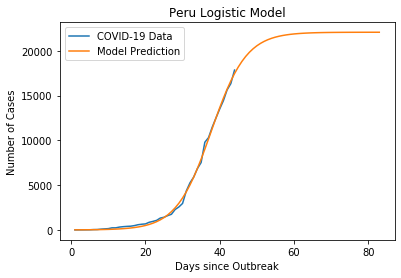

In [50]:

from datetime import datetime
Dates = df.groupby("Last Update")
df1 = Dates.count()

df1 = list(df1.index.values)
df1.sort(key = lambda date: datetime.strptime(date, '%m/%d/%Y'))

PR = df[df["Country/Region"] == "Peru"]  
dPR = PR.groupby("Last Update")
dPR = dPR.sum()
dPR

dPR = list(dPR["Confirmed"].values)
dPR.sort()
dPR
length = len(dPR)
length

dfDate = pd.DataFrame(df1[0:length])
dfDate

PRCases = pd.DataFrame({"Peru": dPR})
PRCases
PRCases = pd.concat([dfDate,PRCases], axis=1, sort = False)
PRCases
PRCases = PRCases.rename(columns={0: "Date"})
PRCases

FMT = '%m/%d/%Y'
days = PRCases['Date']
numday = []
from datetime import datetime 
for a in days:
    x = a
    y = (datetime.strptime(x, FMT) - datetime.strptime("1/21/2020", FMT))
    z = y.days
    numday.append(z)
numday

Day = numday
Cases = list(PRCases.iloc[:,1])

plt.plot(Day, Cases, label="COVID-19 Data")

fit = curve_fit(LogisticModel,Day,Cases,p0=[2,30,75000])
params = fit[0]
v = params[0]
t = params[1]
c = params[2]

print(v)
print(t)
print(c)
infcases=Cases[int(t)]
peakinf.append(math.ceil(infcases))

import math
finishday = t
finishday = math.ceil(finishday)
startdate = "01/21/2020"
startdate = pd.to_datetime(startdate) + pd.DateOffset(days=(91-len(numday)))
startdate

enddate = pd.to_datetime(startdate) + pd.DateOffset(days=finishday)
print("Day of Inflection: " + str(enddate))

sol = int(fsolve(lambda Day : LogisticModel(Day,v,t,c) - int(c),t))
sol

enddate = pd.to_datetime(startdate) + pd.DateOffset(days=sol)
print("End of the Infection: " + str(enddate))

pred_x = list(range(max(Day),sol))
pred_x

Pred = [LogisticModel(i,v,t,c) for i in Day+pred_x]

plt.plot(Day+pred_x, Pred, label="Model Prediction")
plt.title("Peru Logistic Model")
plt.xlabel("Days since Outbreak"); plt.ylabel("Number of Cases")
plt.legend()

In [47]:

from datetime import datetime
Dates = df.groupby("Last Update")
df1 = Dates.count()

Dates = list(df1.index.values)
df
PR = df[df["Country/Region"] == "Peru"]  
dPR = PR.groupby("Last Update")
dPR = dPR.sum()
dPR
length = len(dPR)
dfDate = pd.DataFrame(Dates[0:length])
dfDate

length = len(dPR)
length

dfDate = pd.DataFrame(df1[0:length])
dfDate

PRCases = pd.DataFrame({"Peru": dPR})

PRCases = pd.concat([dfDate,PRCases], axis=1, sort = False)
PRCases
PRCases = PRCases.rename(columns={0: "Date"})
PRCases

FMT = '%m/%d/%Y'
days = PRCases['Date']
numday = []

from datetime import datetime 
for a in days:
#    x = a
    y = (datetime.strptime(a, FMT) - datetime.strptime("1/21/2020", FMT))
    z = y.days
    numday.append(z)

Day = numday
Cases = list(PRCases.iloc[:,1])

plt.plot(Day, Cases, label="COVID-19 Data")

import numpy as np
def LogisticModel(x,v,t,c):
    return c/(1+np.exp(-(x-t)/v))

fit = curve_fit(LogisticModel,Day,Cases,p0=[2,30,75000])
params = fit[0]
v = params[0]
t = params[1]
c = params[2]

print(v)
print(t)
print(c)

infcases=Cases[int(t)-15]
state_inf.append(math.ceil(infcases))

import math
finishday = t
finishday = math.ceil(finishday)
startdate = "01/21/2020"
startdate = pd.to_datetime(startdate) + pd.DateOffset(days=(67-len(numday)))
startdate

enddate = pd.to_datetime(startdate) + pd.DateOffset(days=finishday)
print("Day of Inflection: " + str(enddate))

sol = int(fsolve(lambda Day : LogisticModel(Day,v,t,c) - int(c),t))
sol

enddate = pd.to_datetime(startdate) + pd.DateOffset(days=sol)
print("End of the Infection: " + str(enddate))

pred_x = list(range(max(Day),sol))

Pred = [LogisticModel(i,v,t,c) for i in Day+pred_x]
plt.plot(Day+pred_x, Pred, label="Model Prediction", linestyle="dashed")
plt.title("New York Logistic Model")
plt.xlabel("Days since Outbreak"); plt.ylabel("Number of Cases")
plt.legend()

ValueError: If using all scalar values, you must pass an index

In [2]:
df = pd.read_csv(r'C:\Users\austi\Documents\GitHub\COMP5360Project\project_files\csv_files\usaCLEANCDRdata.csv')
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
import math

In [3]:
state_inf = []

7.15145256755174
52.94240431314908
288657.9063222489
Day of Inflection: 2020-03-31 00:00:00
End of the Infection: 2020-06-29 00:00:00


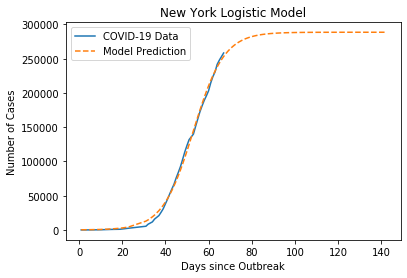

In [4]:
# NY, UT, CA, WA, IL, SD, ID, AZ, TX, NM, AL, WA-DC
from datetime import datetime
Dates = df.groupby("Last Update")
df1 = Dates.count()

Dates = list(df1.index.values)
df
NY = df[df["Province/State"] == 'NY']
dNY = NY.groupby("Last Update")
dNY = dNY.sum()
dNY = list(dNY["Confirmed"].values)
dNY
length = len(dNY)
dfDate = pd.DataFrame(Dates[0:length])
dfDate

NYCases = pd.DataFrame({"New York": dNY})
NYCases
NYCases = pd.concat([dfDate,NYCases], axis=1, sort = False)
NYCases
NYCases = NYCases.rename(columns={0: "Date"})
NYCases

FMT = '%m/%d/%Y'
days = NYCases['Date']
numday = []

from datetime import datetime 
for a in days:
#    x = a
    y = (datetime.strptime(a, FMT) - datetime.strptime("1/21/2020", FMT))
    z = y.days
    numday.append(z)

Day = numday
Cases = list(NYCases.iloc[:,1])

plt.plot(Day, Cases, label="COVID-19 Data")

import numpy as np
def LogisticModel(x,v,t,c):
    return c/(1+np.exp(-(x-t)/v))

fit = curve_fit(LogisticModel,Day,Cases,p0=[2,30,75000])
params = fit[0]
v = params[0]
t = params[1]
c = params[2]

print(v)
print(t)
print(c)

infcases=Cases[int(t)-5]
state_inf.append(math.ceil(infcases))

import math
finishday = t
finishday = math.ceil(finishday)
startdate = "01/21/2020"
startdate = pd.to_datetime(startdate) + pd.DateOffset(days=(67-len(numday)))
startdate

enddate = pd.to_datetime(startdate) + pd.DateOffset(days=finishday)
print("Day of Inflection: " + str(enddate))

sol = int(fsolve(lambda Day : LogisticModel(Day,v,t,c) - int(c),t))
sol

enddate = pd.to_datetime(startdate) + pd.DateOffset(days=sol)
print("End of the Infection: " + str(enddate))

pred_x = list(range(max(Day),sol))

Pred = [LogisticModel(i,v,t,c) for i in Day+pred_x]
plt.plot(Day+pred_x, Pred, label="Model Prediction", linestyle="dashed")
plt.title("New York Logistic Model")
plt.xlabel("Days since Outbreak"); plt.ylabel("Number of Cases")
plt.legend()

9.251886993328766
47.626145799986425
4168.331921889391
Day of Inflection: 2020-04-03 00:00:00
End of the Infection: 2020-06-28 00:00:00


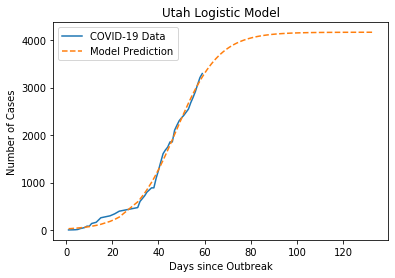

In [5]:
from datetime import datetime
Dates = df.groupby("Last Update")
df1 = Dates.count()

Dates = list(df1.index.values)
UT = df[df["Province/State"] == 'UT']
dUT = UT.groupby("Last Update")
dUT = dUT.sum()
dUT = list(dUT["Confirmed"].values)

length = len(dUT)
dfDate = pd.DataFrame(Dates[0:length])

UTCases = pd.DataFrame({"Utah": dUT})
UTCases = pd.concat([dfDate,UTCases], axis=1, sort = False)
UTCases = UTCases.rename(columns={0: "Date"})

FMT = '%m/%d/%Y'
days = UTCases['Date']
numday = []

from datetime import datetime 
for a in days:
    y = (datetime.strptime(a, FMT) - datetime.strptime("1/21/2020", FMT))
    z = y.days
    numday.append(z)

Day = numday
Cases = list(UTCases.iloc[:,1])

plt.plot(Day, Cases, label="COVID-19 Data")

import numpy as np
def LogisticModel(x,v,t,c):
    return c/(1+np.exp(-(x-t)/v))

fit = curve_fit(LogisticModel,Day,Cases,p0=[2,30,75000])
params = fit[0]
v = params[0]
t = params[1]
c = params[2]
print(v)
print(t)
print(c)
infcases=Cases[int(t)-8]
state_inf.append(math.ceil(infcases))

import math
finishday = t
finishday = math.ceil(finishday)
startdate = "01/21/2020"
startdate = pd.to_datetime(startdate) + pd.DateOffset(days=(67-len(numday)))

enddate = pd.to_datetime(startdate) + pd.DateOffset(days=finishday)
print("Day of Inflection: " + str(enddate))

sol = int(fsolve(lambda Day : LogisticModel(Day,v,t,c) - int(c),t))

enddate = pd.to_datetime(startdate) + pd.DateOffset(days=sol)
print("End of the Infection: " + str(enddate))

pred_x = list(range(max(Day),sol))

Pred = [LogisticModel(i,v,t,c) for i in Day+pred_x]
plt.plot(Day+pred_x, Pred, label="Model Prediction", linestyle="dashed")
plt.title("Utah Logistic Model")
plt.xlabel("Days since Outbreak"); plt.ylabel("Number of Cases")
plt.legend()

6.671320777399415
69.96242447629608
38755.11284324129
Day of Inflection: 2020-04-02 00:00:00
End of the Infection: 2020-06-26 00:00:00


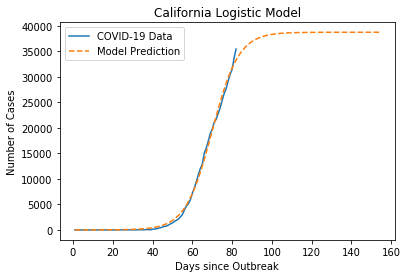

In [6]:
from datetime import datetime
Dates = df.groupby("Last Update")
df1 = Dates.count()

Dates = list(df1.index.values)
CA = df[df["Province/State"] == 'CA']
dCA = CA.groupby("Last Update")
dCA = dCA.sum()
dCA = list(dCA["Confirmed"].values)

length = len(dCA)
dfDate = pd.DataFrame(Dates[0:length])

CACases = pd.DataFrame({"California": dCA})
CACases = pd.concat([dfDate,CACases], axis=1, sort = False)
CACases = CACases.rename(columns={0: "Date"})

FMT = '%m/%d/%Y'
days = CACases['Date']
numday = []

from datetime import datetime 
for a in days:
    y = (datetime.strptime(a, FMT) - datetime.strptime("1/21/2020", FMT))
    z = y.days
    numday.append(z)

Day = numday
Cases = list(CACases.iloc[:,1])

plt.plot(Day, Cases, label="COVID-19 Data")

import numpy as np
def LogisticModel(x,v,t,c):
    return c/(1+np.exp(-(x-t)/v))

fit = curve_fit(LogisticModel,Day,Cases,p0=[2,30,75000])
params = fit[0]
v = params[0]
t = params[1]
c = params[2]

print(v)
print(t)
print(c)
infcases=Cases[int(t)-5]
state_inf.append(math.ceil(infcases))

import math
finishday = t
finishday = math.ceil(finishday)
startdate = "01/21/2020"
startdate = pd.to_datetime(startdate) + pd.DateOffset(days=(67-len(numday)))

enddate = pd.to_datetime(startdate) + pd.DateOffset(days=finishday)
print("Day of Inflection: " + str(enddate))

sol = int(fsolve(lambda Day : LogisticModel(Day,v,t,c) - int(c),t))

enddate = pd.to_datetime(startdate) + pd.DateOffset(days=sol)
print("End of the Infection: " + str(enddate))

pred_x = list(range(max(Day),sol))

Pred = [LogisticModel(i,v,t,c) for i in Day+pred_x]
plt.plot(Day+pred_x, Pred, label="Model Prediction", linestyle="dashed")
plt.title("California Logistic Model")
plt.xlabel("Days since Outbreak"); plt.ylabel("Number of Cases")
plt.legend()

6.640671861284278
62.25274040309185
12935.015957383686
Day of Inflection: 2020-03-27 00:00:00
End of the Infection: 2020-06-24 00:00:00


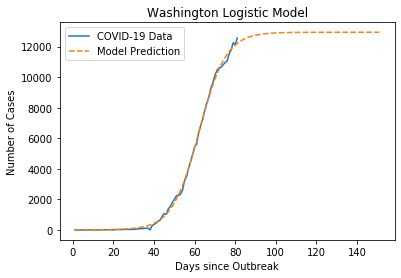

In [7]:
from datetime import datetime
Dates = df.groupby("Last Update")
df1 = Dates.count()

Dates = list(df1.index.values)
WA = df[df["Province/State"] == 'WA']
dWA = WA.groupby("Last Update")
dWA = dWA.sum()
dWA = list(dWA["Confirmed"].values)

length = len(dWA)
dfDate = pd.DataFrame(Dates[0:length])

WACases = pd.DataFrame({"Washington": dWA})
WACases = pd.concat([dfDate,WACases], axis=1, sort = False)
WACases = WACases.rename(columns={0: "Date"})

FMT = '%m/%d/%Y'
days = WACases['Date']
numday = []

from datetime import datetime 
for a in days:
    y = (datetime.strptime(a, FMT) - datetime.strptime("1/21/2020", FMT))
    z = y.days
    numday.append(z)

Day = numday
Cases = list(WACases.iloc[:,1])

plt.plot(Day, Cases, label="COVID-19 Data")

import numpy as np
def LogisticModel(x,v,t,c):
    return c/(1+np.exp(-(x-t)/v))

fit = curve_fit(LogisticModel,Day,Cases,p0=[2,30,75000])
params = fit[0]
v = params[0]
t = params[1]
c = params[2]

print(v)
print(t)
print(c)
infcases=Cases[int(t)]
state_inf.append(math.ceil(infcases))

import math
finishday = t
finishday = math.ceil(finishday)
startdate = "01/21/2020"
startdate = pd.to_datetime(startdate) + pd.DateOffset(days=(67-len(numday)))

enddate = pd.to_datetime(startdate) + pd.DateOffset(days=finishday)
print("Day of Inflection: " + str(enddate))

sol = int(fsolve(lambda Day : LogisticModel(Day,v,t,c) - int(c),t))

enddate = pd.to_datetime(startdate) + pd.DateOffset(days=sol)
print("End of the Infection: " + str(enddate))

pred_x = list(range(max(Day),sol))

Pred = [LogisticModel(i,v,t,c) for i in Day+pred_x]
plt.plot(Day+pred_x, Pred, label="Model Prediction", linestyle="dashed")
plt.title("Washington Logistic Model")
plt.xlabel("Days since Outbreak"); plt.ylabel("Number of Cases")
plt.legend()

6.710929964942763
64.92538173091465
40840.446102129135
Day of Inflection: 2020-04-05 00:00:00
End of the Infection: 2020-06-20 00:00:00


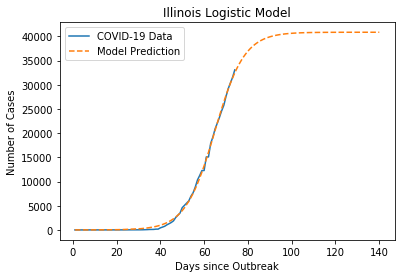

In [8]:
from datetime import datetime
Dates = df.groupby("Last Update")
df1 = Dates.count()

Dates = list(df1.index.values)
IL = df[df["Province/State"] == 'IL']
dIL = IL.groupby("Last Update")
dIL = dIL.sum()
dIL = list(dIL["Confirmed"].values)

length = len(dIL)
dfDate = pd.DataFrame(Dates[0:length])

ILCases = pd.DataFrame({"Illinois": dIL})
ILCases = pd.concat([dfDate,ILCases], axis=1, sort = False)
ILCases = ILCases.rename(columns={0: "Date"})

FMT = '%m/%d/%Y'
days = ILCases['Date']
numday = []

from datetime import datetime 
for a in days:
    y = (datetime.strptime(a, FMT) - datetime.strptime("1/21/2020", FMT))
    z = y.days
    numday.append(z)

Day = numday
Cases = list(ILCases.iloc[:,1])

plt.plot(Day, Cases, label="COVID-19 Data")

import numpy as np
def LogisticModel(x,v,t,c):
    return c/(1+np.exp(-(x-t)/v))

fit = curve_fit(LogisticModel,Day,Cases,p0=[2,30,75000])
params = fit[0]
v = params[0]
t = params[1]
c = params[2]

print(v)
print(t)
print(c)
infcases=Cases[int(t)-8]
state_inf.append(math.ceil(infcases))

import math
finishday = t
finishday = math.ceil(finishday)
startdate = "01/21/2020"
startdate = pd.to_datetime(startdate) + pd.DateOffset(days=(67-len(numday)))

enddate = pd.to_datetime(startdate) + pd.DateOffset(days=finishday)
print("Day of Inflection: " + str(enddate))

sol = int(fsolve(lambda Day : LogisticModel(Day,v,t,c) - int(c),t))

enddate = pd.to_datetime(startdate) + pd.DateOffset(days=sol)
print("End of the Infection: " + str(enddate))

pred_x = list(range(max(Day),sol))

Pred = [LogisticModel(i,v,t,c) for i in Day+pred_x]
plt.plot(Day+pred_x, Pred, label="Model Prediction", linestyle="dashed")
plt.title("Illinois Logistic Model")
plt.xlabel("Days since Outbreak"); plt.ylabel("Number of Cases")
plt.legend()

4.424982640738484
46.42993195483721
2137.6943339945547
Day of Inflection: 2020-04-07 00:00:00
End of the Infection: 2020-05-11 00:00:00


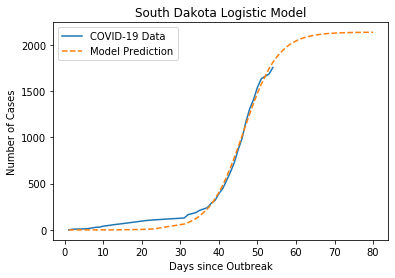

In [9]:
from datetime import datetime
Dates = df.groupby("Last Update")
df1 = Dates.count()

Dates = list(df1.index.values)
SD = df[df["Province/State"] == 'SD']
dSD = SD.groupby("Last Update")
dSD = dSD.sum()
dSD = list(dSD["Confirmed"].values)

length = len(dSD)
dfDate = pd.DataFrame(Dates[0:length])

SDCases = pd.DataFrame({"South Dakota": dSD})
SDCases = pd.concat([dfDate,SDCases], axis=1, sort = False)
SDCases = SDCases.rename(columns={0: "Date"})

FMT = '%m/%d/%Y'
days = SDCases['Date']
numday = []

from datetime import datetime 
for a in days:
    y = (datetime.strptime(a, FMT) - datetime.strptime("1/21/2020", FMT))
    z = y.days
    numday.append(z)

Day = numday
Cases = list(SDCases.iloc[:,1])

plt.plot(Day, Cases, label="COVID-19 Data")

import numpy as np
def LogisticModel(x,v,t,c):
    return c/(1+np.exp(-(x-t)/v))

fit = curve_fit(LogisticModel,Day,Cases,p0=[2,30,75000])
params = fit[0]
v = params[0]
t = params[1]
c = params[2]

print(v)
print(t)
print(c)
infcases=Cases[int(t)-10]
state_inf.append(math.ceil(infcases))

import math
finishday = t
finishday = math.ceil(finishday)
startdate = "01/21/2020"
startdate = pd.to_datetime(startdate) + pd.DateOffset(days=(67-len(numday)))

enddate = pd.to_datetime(startdate) + pd.DateOffset(days=finishday)
print("Day of Inflection: " + str(enddate))

sol = int(fsolve(lambda Day : LogisticModel(Day,v,t,c) - int(c),t))

enddate = pd.to_datetime(startdate) + pd.DateOffset(days=sol)
print("End of the Infection: " + str(enddate))

pred_x = list(range(max(Day),sol))

Pred = [LogisticModel(i,v,t,c) for i in Day+pred_x]
plt.plot(Day+pred_x, Pred, label="Model Prediction", linestyle="dashed")
plt.title("South Dakota Logistic Model")
plt.xlabel("Days since Outbreak"); plt.ylabel("Number of Cases")
plt.legend()

7.128139670395438
37.638392326303
1845.2110796149734
Day of Inflection: 2020-03-27 00:00:00
End of the Infection: 2020-05-30 00:00:00


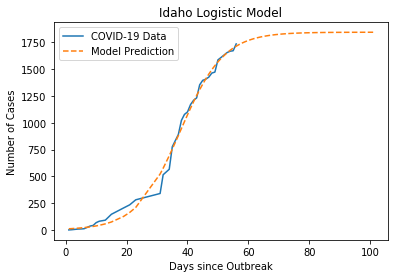

In [10]:
from datetime import datetime
Dates = df.groupby("Last Update")
df1 = Dates.count()

Dates = list(df1.index.values)
ID = df[df["Province/State"] == 'ID']
dID = ID.groupby("Last Update")
dID = dID.sum()
dID = list(dID["Confirmed"].values)

length = len(dID)
dfDate = pd.DataFrame(Dates[0:length])

IDCases = pd.DataFrame({"Idaho": dID})
IDCases = pd.concat([dfDate,IDCases], axis=1, sort = False)
IDCases = IDCases.rename(columns={0: "Date"})

FMT = '%m/%d/%Y'
days = IDCases['Date']
numday = []

from datetime import datetime 
for a in days:
    y = (datetime.strptime(a, FMT) - datetime.strptime("1/21/2020", FMT))
    z = y.days
    numday.append(z)

Day = numday
Cases = list(IDCases.iloc[:,1])

plt.plot(Day, Cases, label="COVID-19 Data")

import numpy as np
def LogisticModel(x,v,t,c):
    return c/(1+np.exp(-(x-t)/v))

fit = curve_fit(LogisticModel,Day,Cases,p0=[2,30,75000])
params = fit[0]
v = params[0]
t = params[1]
c = params[2]
print(v)
print(t)
print(c)
infcases=Cases[int(t)]
state_inf.append(math.ceil(infcases))

import math
finishday = t
finishday = math.ceil(finishday)
startdate = "01/21/2020"
startdate = pd.to_datetime(startdate) + pd.DateOffset(days=(67-len(numday)))

enddate = pd.to_datetime(startdate) + pd.DateOffset(days=finishday)
print("Day of Inflection: " + str(enddate))

sol = int(fsolve(lambda Day : LogisticModel(Day,v,t,c) - int(c),t))

enddate = pd.to_datetime(startdate) + pd.DateOffset(days=sol)
print("End of the Infection: " + str(enddate))

pred_x = list(range(max(Day),sol))

Pred = [LogisticModel(i,v,t,c) for i in Day+pred_x]
plt.plot(Day+pred_x, Pred, label="Model Prediction", linestyle="dashed")
plt.title("Idaho Logistic Model")
plt.xlabel("Days since Outbreak"); plt.ylabel("Number of Cases")
plt.legend()

6.718306729250544
54.46544504438201
5626.258858535184
Day of Inflection: 2020-04-01 00:00:00
End of the Infection: 2020-06-06 00:00:00


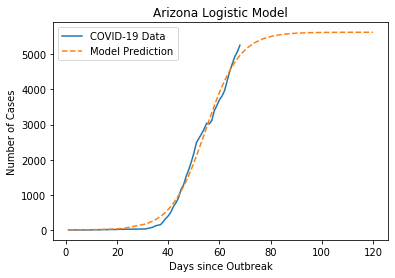

In [11]:
from datetime import datetime
Dates = df.groupby("Last Update")
df1 = Dates.count()

Dates = list(df1.index.values)
AZ = df[df["Province/State"] == 'AZ']
dAZ = AZ.groupby("Last Update")
dAZ = dAZ.sum()
dAZ= list(dAZ["Confirmed"].values)

length = len(dAZ)
dfDate = pd.DataFrame(Dates[0:length])

WICases = pd.DataFrame({"Arizona": dAZ})
WICases = pd.concat([dfDate,WICases], axis=1, sort = False)
WICases = WICases.rename(columns={0: "Date"})

FMT = '%m/%d/%Y'
days = WICases['Date']
numday = []

from datetime import datetime 
for a in days:
    y = (datetime.strptime(a, FMT) - datetime.strptime("1/21/2020", FMT))
    z = y.days
    numday.append(z)

Day = numday
Cases = list(WICases.iloc[:,1])

plt.plot(Day, Cases, label="COVID-19 Data")

import numpy as np
def LogisticModel(x,v,t,c):
    return c/(1+np.exp(-(x-t)/v))

fit = curve_fit(LogisticModel,Day,Cases,p0=[2,30,75000])
params = fit[0]
v = params[0]
t = params[1]
c = params[2]
print(v)
print(t)
print(c)
infcases=Cases[int(t)-4]
state_inf.append(math.ceil(infcases))

import math
finishday = t
finishday = math.ceil(finishday)
startdate = "01/21/2020"
startdate = pd.to_datetime(startdate) + pd.DateOffset(days=(67-len(numday)))

enddate = pd.to_datetime(startdate) + pd.DateOffset(days=finishday)
print("Day of Inflection: " + str(enddate))

sol = int(fsolve(lambda Day : LogisticModel(Day,v,t,c) - int(c),t))

enddate = pd.to_datetime(startdate) + pd.DateOffset(days=sol)
print("End of the Infection: " + str(enddate))

pred_x = list(range(max(Day),sol))

Pred = [LogisticModel(i,v,t,c) for i in Day+pred_x]
plt.plot(Day+pred_x, Pred, label="Model Prediction", linestyle="dashed")
plt.title("Arizona Logistic Model")
plt.xlabel("Days since Outbreak"); plt.ylabel("Number of Cases")
plt.legend()

6.504706517110325
57.17292909623497
24070.730986521772
Day of Inflection: 2020-04-04 00:00:00
End of the Infection: 2020-06-09 00:00:00


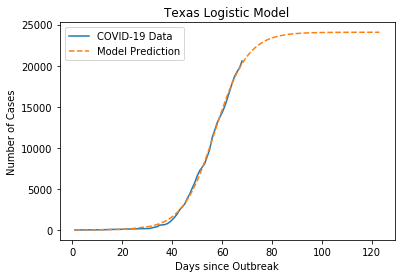

In [12]:
from datetime import datetime
Dates = df.groupby("Last Update")
df1 = Dates.count()

Dates = list(df1.index.values)
AZ = df[df["Province/State"] == 'TX']
dAZ = AZ.groupby("Last Update")
dAZ = dAZ.sum()
dAZ= list(dAZ["Confirmed"].values)

length = len(dAZ)
dfDate = pd.DataFrame(Dates[0:length])

WICases = pd.DataFrame({"Arizona": dAZ})
WICases = pd.concat([dfDate,WICases], axis=1, sort = False)
WICases = WICases.rename(columns={0: "Date"})

FMT = '%m/%d/%Y'
days = WICases['Date']
numday = []

from datetime import datetime 
for a in days:
    y = (datetime.strptime(a, FMT) - datetime.strptime("1/21/2020", FMT))
    z = y.days
    numday.append(z)

Day = numday
Cases = list(WICases.iloc[:,1])

plt.plot(Day, Cases, label="COVID-19 Data")

import numpy as np
def LogisticModel(x,v,t,c):
    return c/(1+np.exp(-(x-t)/v))

fit = curve_fit(LogisticModel,Day,Cases,p0=[2,30,75000])
params = fit[0]
v = params[0]
t = params[1]
c = params[2]
print(v)
print(t)
print(c)
infcases=Cases[int(t)-7]
state_inf.append(math.ceil(infcases))

import math
finishday = t
finishday = math.ceil(finishday)
startdate = "01/21/2020"
startdate = pd.to_datetime(startdate) + pd.DateOffset(days=(67-len(numday)))

enddate = pd.to_datetime(startdate) + pd.DateOffset(days=finishday)
print("Day of Inflection: " + str(enddate))

sol = int(fsolve(lambda Day : LogisticModel(Day,v,t,c) - int(c),t))

enddate = pd.to_datetime(startdate) + pd.DateOffset(days=sol)
print("End of the Infection: " + str(enddate))

pred_x = list(range(max(Day),sol))

Pred = [LogisticModel(i,v,t,c) for i in Day+pred_x]
plt.plot(Day+pred_x, Pred, label="Model Prediction", linestyle="dashed")
plt.title("Texas Logistic Model")
plt.xlabel("Days since Outbreak"); plt.ylabel("Number of Cases")
plt.legend()

7.999926132638276
49.26196375034727
2750.2879550728194
Day of Inflection: 2020-04-07 00:00:00
End of the Infection: 2020-06-18 00:00:00


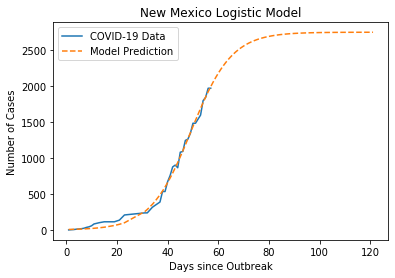

In [13]:
from datetime import datetime
Dates = df.groupby("Last Update")
df1 = Dates.count()

Dates = list(df1.index.values)
AZ = df[df["Province/State"] == 'NM']
dAZ = AZ.groupby("Last Update")
dAZ = dAZ.sum()
dAZ= list(dAZ["Confirmed"].values)

length = len(dAZ)
dfDate = pd.DataFrame(Dates[0:length])

WICases = pd.DataFrame({"Arizona": dAZ})
WICases = pd.concat([dfDate,WICases], axis=1, sort = False)
WICases = WICases.rename(columns={0: "Date"})

FMT = '%m/%d/%Y'
days = WICases['Date']
numday = []

from datetime import datetime 
for a in days:
    y = (datetime.strptime(a, FMT) - datetime.strptime("1/21/2020", FMT))
    z = y.days
    numday.append(z)

Day = numday
Cases = list(WICases.iloc[:,1])

plt.plot(Day, Cases, label="COVID-19 Data")

import numpy as np
def LogisticModel(x,v,t,c):
    return c/(1+np.exp(-(x-t)/v))

fit = curve_fit(LogisticModel,Day,Cases,p0=[2,30,75000])
params = fit[0]
v = params[0]
t = params[1]
c = params[2]
print(v)
print(t)
print(c)
infcases=Cases[int(t)-10]
state_inf.append(math.ceil(infcases))

import math
finishday = t
finishday = math.ceil(finishday)
startdate = "01/21/2020"
startdate = pd.to_datetime(startdate) + pd.DateOffset(days=(67-len(numday)))

enddate = pd.to_datetime(startdate) + pd.DateOffset(days=finishday)
print("Day of Inflection: " + str(enddate))

sol = int(fsolve(lambda Day : LogisticModel(Day,v,t,c) - int(c),t))

enddate = pd.to_datetime(startdate) + pd.DateOffset(days=sol)
print("End of the Infection: " + str(enddate))

pred_x = list(range(max(Day),sol))

Pred = [LogisticModel(i,v,t,c) for i in Day+pred_x]
plt.plot(Day+pred_x, Pred, label="Model Prediction", linestyle="dashed")
plt.title("New Mexico Logistic Model")
plt.xlabel("Days since Outbreak"); plt.ylabel("Number of Cases")
plt.legend()

8.790590089218483
48.35466962200939
7662.535310034181
Day of Inflection: 2020-04-07 00:00:00
End of the Infection: 2020-06-29 00:00:00


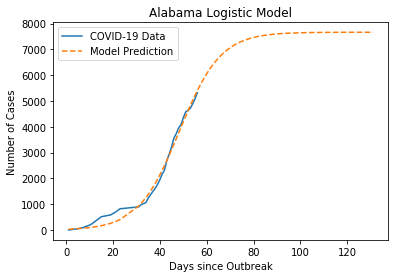

In [14]:
from datetime import datetime
Dates = df.groupby("Last Update")
df1 = Dates.count()

Dates = list(df1.index.values)
AZ = df[df["Province/State"] == 'AL']
dAZ = AZ.groupby("Last Update")
dAZ = dAZ.sum()
dAZ= list(dAZ["Confirmed"].values)

length = len(dAZ)
dfDate = pd.DataFrame(Dates[0:length])

WICases = pd.DataFrame({"Arizona": dAZ})
WICases = pd.concat([dfDate,WICases], axis=1, sort = False)
WICases = WICases.rename(columns={0: "Date"})

FMT = '%m/%d/%Y'
days = WICases['Date']
numday = []

from datetime import datetime 
for a in days:
    y = (datetime.strptime(a, FMT) - datetime.strptime("1/21/2020", FMT))
    z = y.days
    numday.append(z)

Day = numday
Cases = list(WICases.iloc[:,1])

plt.plot(Day, Cases, label="COVID-19 Data")

import numpy as np
def LogisticModel(x,v,t,c):
    return c/(1+np.exp(-(x-t)/v))

fit = curve_fit(LogisticModel,Day,Cases,p0=[2,30,75000])
params = fit[0]
v = params[0]
t = params[1]
c = params[2]
print(v)
print(t)
print(c)
infcases=Cases[int(t)-10]
state_inf.append(math.ceil(infcases))

import math
finishday = t
finishday = math.ceil(finishday)
startdate = "01/21/2020"
startdate = pd.to_datetime(startdate) + pd.DateOffset(days=(67-len(numday)))

enddate = pd.to_datetime(startdate) + pd.DateOffset(days=finishday)
print("Day of Inflection: " + str(enddate))

sol = int(fsolve(lambda Day : LogisticModel(Day,v,t,c) - int(c),t))

enddate = pd.to_datetime(startdate) + pd.DateOffset(days=sol)
print("End of the Infection: " + str(enddate))

pred_x = list(range(max(Day),sol))

Pred = [LogisticModel(i,v,t,c) for i in Day+pred_x]
plt.plot(Day+pred_x, Pred, label="Model Prediction", linestyle="dashed")
plt.title("Alabama Logistic Model")
plt.xlabel("Days since Outbreak"); plt.ylabel("Number of Cases")
plt.legend()

8.293286911768963
49.4810239328428
4269.150308933548
Day of Inflection: 2020-04-07 00:00:00
End of the Infection: 2020-06-30 00:00:00


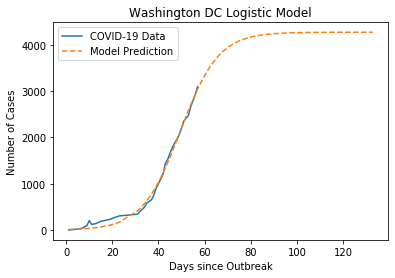

In [15]:
from datetime import datetime
Dates = df.groupby("Last Update")
df1 = Dates.count()

Dates = list(df1.index.values)
AZ = df[df["Province/State"] == 'DC']
dAZ = AZ.groupby("Last Update")
dAZ = dAZ.sum()
dAZ= list(dAZ["Confirmed"].values)

length = len(dAZ)
dfDate = pd.DataFrame(Dates[0:length])

WICases = pd.DataFrame({"Arizona": dAZ})
WICases = pd.concat([dfDate,WICases], axis=1, sort = False)
WICases = WICases.rename(columns={0: "Date"})

FMT = '%m/%d/%Y'
days = WICases['Date']
numday = []

from datetime import datetime 
for a in days:
    y = (datetime.strptime(a, FMT) - datetime.strptime("1/21/2020", FMT))
    z = y.days
    numday.append(z)

Day = numday
Cases = list(WICases.iloc[:,1])

plt.plot(Day, Cases, label="COVID-19 Data")

import numpy as np
def LogisticModel(x,v,t,c):
    return c/(1+np.exp(-(x-t)/v))

fit = curve_fit(LogisticModel,Day,Cases,p0=[2,87,100000])
params = fit[0]
v = params[0]
t = params[1]
c = params[2]
print(v)
print(t)
print(c)
infcases=Cases[int(t)-10]
state_inf.append(math.ceil(infcases))

import math
finishday = t
finishday = math.ceil(finishday)
startdate = "01/21/2020"
startdate = pd.to_datetime(startdate) + pd.DateOffset(days=(67-len(numday)))

enddate = pd.to_datetime(startdate) + pd.DateOffset(days=finishday)
print("Day of Inflection: " + str(enddate))

sol = int(fsolve(lambda Day : LogisticModel(Day,v,t,c) - int(c),t))

enddate = pd.to_datetime(startdate) + pd.DateOffset(days=sol)
print("End of the Infection: " + str(enddate))

pred_x = list(range(max(Day),sol))

Pred = [LogisticModel(i,v,t,c) for i in Day+pred_x]
plt.plot(Day+pred_x, Pred, label="Model Prediction", linestyle="dashed")
plt.title("Washington DC Logistic Model")
plt.xlabel("Days since Outbreak"); plt.ylabel("Number of Cases")
plt.legend()

In [16]:

print(state_inf)
peakinf

[247815, 3069, 35465, 12114, 33059, 1755, 1672, 5256, 20574, 1971, 5317, 3098]


[]

In [ ]:
data = pd.DataFrame({"PeakInfections": peakinf})
country = ["China", "South Korea", "United States", "Italy", "United Kingdom", "New Zealand", "Iran", "Australia", "India", "Peru"]
cont = pd.DataFrame({"Country": country})
data = pd.concat([cont,data], axis=1, sort = False)
data=data.sort_values(['Country'])
data=data.reset_index(drop=True)
data

In [ ]:
df3 = pd.read_csv(r'C:\Users\austi\Documents\GitHub\COMP5360Project\project_files\csv_files\CLEAN_WorldHealthIndex.csv')
df4 = pd.read_csv(r'C:\Users\austi\Documents\GitHub\COMP5360Project\project_files\csv_files\population_and_density_by_country.csv')

In [ ]:

countries = ['UnitedStatesofAmerica','Italy', 'China','UnitedKingdom','Iran,IslamicRepublicof',  'RepublicofKorea',   'Australia' , 'India','NewZealand', 'Peru']
countries2 = ['United States','Italy', 'China','United Kingdom','Iran',  'South Korea',   'Australia' , 'India','New Zealand', 'Peru']
df3 = df3.loc[df3['Member State'].isin(countries)]
df4 = df4.loc[df4['name'].isin(countries2)]
df3 = df3.sort_values(by=['Member State'])
df4 = df4.sort_values(by=['name'])
indexes = list(df3['Index'].values)
pop_density= list(df4["Density"].values)
population=list(df4['pop2019'].values)
index = pd.DataFrame({"WHOIndex": indexes})
pop_density = pd.DataFrame({"PopulationDensity": pop_density,'population':population})
data = pd.concat([data,index], axis=1, sort = False)
data = pd.concat([data,pop_density], axis=1, sort = False)
data

In [ ]:
correlation= data.corr()
plt.style.use('default')
Global_heatmap=plt.pcolor(correlation,vmin=-1,vmax=1,cmap=plt.cm.Reds)
plt.colorbar(Global_heatmap)
plt.xticks((range(4)),['Peak Infections','WHO Index', 'Population Dens.','population'])
plt.yticks((range(4)),['Peak Infections','WHO Index', 'Population Dens.','population'])           

In [ ]:
import seaborn as sns
sns.set()
#sns.pairplot(data)#, hue="Language");

In [ ]:
import statsmodels.formula.api as sm
peak_infections_linear_regression = sm.ols(formula="PeakInfections~ WHOIndex+population", data=data).fit()
peak_infections_linear_regression.summary()

In [ ]:
df1 = pd.read_csv("/Users/markomiholjcic/Documents/GitHub/COMP5360Project/project_files/csv_files/Nation_HealthSurvey_Variables.csv")

df2 = pd.read_csv("/Users/markomiholjcic/Documents/GitHub/COMP5360Project/project_files/csv_files/CLEANHospitals.csv")

df3 = pd.read_csv("/Users/markomiholjcic/Documents/GitHub/COMP5360Project/project_files/csv_files/CLEANpopulation_and_population_density_USA.csv")

df4 = pd.read_csv(r"/Users/markomiholjcic/Documents/GitHub/COMP5360Project/project_files/csv_files/usaCLEANCDRData.csv")

In [ ]:
df1 = pd.read_csv(r"C:\Users\austi\Documents\GitHub\COMP5360Project\project_files\csv_files\Nation_HealthSurvey_Variables.csv")

df2 = pd.read_csv(r"C:\Users\austi\Documents\GitHub\COMP5360Project\project_files\csv_files\CLEANHospitals.csv")

df3 = pd.read_csv(r"C:\Users\austi\Documents\GitHub\COMP5360Project\project_files\csv_files\CLEANpopulation_and_population_density_USA.csv")

df4 = pd.read_csv(r"C:\Users\austi\Documents\GitHub\COMP5360Project\project_files\csv_files\usaCLEANCDRData.csv")

In [ ]:


states = ["Alabama", "Alaska", "Arizona", "Arkansas", "California", "Colorado", "Connecticut", "Delaware",
          "Florida", "Georgia", "Hawaii", "Idaho", "Illinois", "Indiana", "Iowa", "Kansas", "Kentucky", "Louisiana",
          "Maine", "Maryland", "Massachusetts", "Michigan", "Minnesota", "Mississippi", "Missouri", "Montana", 
          "Nebraska", "Nevada", "New Hampshire", "New Jersey", "New Mexico", "New York", "North Carolina", 
          "North Dakota", "Ohio", "Oklahoma", "Oregon", "Pennsylvania", "Rhode Island", "South Carolina", 
          "South Dakota", "Tennessee", "Texas", "Utah", "Vermont", "Virginia", "Washington", 
          "West Virginia", "Wisconsin", "Wyoming", "District of Columbia"]
abb = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DE", "FL", "GA", "HI", "ID", "IL", "IN", "IA", "KS", "KY", 
       "LA", "ME", "MD", "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", "NM", "NY", "NC", "ND", "OH",
       "OK", "OR", "PA", "RI", "SC", "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY", "DC"]

for x in range(51):
    df4["Province/State"] = df4["Province/State"].replace(abb[x], states[x])
        
df4 = df4[df4["Last Update"] == "04/21/2020"]
groupData = df4.groupby("Province/State")
df4 = groupData.sum()

df1 = df1.rename(columns = {"State": "Province/State","# Primary Care Physicians":"Primary Care Physicians"})
df1 = df1.set_index('Province/State')

df2 = df2.rename(columns={"Location": "Province/State"})
df2 = df2.rename(columns ={"Total": "Total Beds"})
df2 = df2.set_index('Province/State')
df3 = df3.rename(columns = {"State": "Province/State"})
df3 = df3.set_index('Province/State')

df4 = df4[["Confirmed"]]
df4

df = pd.concat([df1,df2], axis=1, sort = False)
df = pd.concat([df, df3], axis = 1, sort = False)
df = pd.concat([df, df4], axis = 1, sort = False)
#df = df.drop('Deaths', axis=1)
df.columns = df.columns.str.replace(' ', '')
df.columns = df.columns.str.replace('%', 'Perc')
df.columns = df.columns.str.replace('-', '')
df.columns = df.columns.str.replace('.', '')
df.dtypes


In [ ]:
corr_m = df.corr()
plt.style.use('default')
heatmap = plt.pcolor(corr_m, vmin = -1, vmax = 1, cmap=plt.cm.Blues)
# plot the legend on the side
plt.colorbar(heatmap)

plt.xticks((np.arange(0, 30, step=1)), ['Deaths','Years of Potential Life Lost Rate', 
                                        'Average Number of Physically Unhealthy Days',
                                        'Average Number of Mentally Unhealthy Days',
                                       '% Smokers', '% Adults with Obesity ',
                                       'Food Environment Index','% Physically Inactive',
                                       '% With Access to Exercise Opportunities','Chlamydia Rate', 
                                        '% Uninsured', 'Primary Care Physicians', 
                                       'Primary Care Physicians Rate', 'Preventable Hospitalization Rate', 
                                       '% Vaccinated','High School Graduation Rate','% Some College',
                                       '% Unemployed', '% Children in Poverty', 'Income Ratio',
                                       '% Single-Parent Households', 'Social Association Rate',
                                        'Average Daily PM2.5', '% Severe Housing Problems',
                                        '% Long Commute - Drives Alone','Total Beds','Density','Pop',
                                        'LandArea', 'Confirmed'], rotation = 90)
plt.yticks((np.arange(0, 30, step=1)), ['Deaths','Years of Potential Life Lost Rate', 
                                        'Average Number of Physically Unhealthy Days',
                                        'Average Number of Mentally Unhealthy Days',
                                       '% Smokers', '% Adults with Obesity ',
                                       'Food Environment Index','% Physically Inactive',
                                       '% With Access to Exercise Opportunities','Chlamydia Rate', 
                                        '% Uninsured', 'Primary Care Physicians', 
                                       'Primary Care Physicians Rate', 'Preventable Hospitalization Rate', 
                                       '% Vaccinated','High School Graduation Rate','% Some College',
                                       '% Unemployed', '% Children in Poverty', 'Income Ratio',
                                       '% Single-Parent Households', 'Social Association Rate',
                                        'Average Daily PM2.5', '% Severe Housing Problems',
                                        '% Long Commute - Drives Alone','Total Beds','Density','Pop',
                                        'LandArea', 'Confirmed'], rotation = 0)

plt.title("HeatMap for State Data")
casescorr=corr_m['Confirmed']
casescorr.abs()

In [ ]:
import statsmodels.formula.api as sm
peak_infections_linear_regression = sm.ols(formula="Confirmed~ PrimaryCarePhysicians + Deaths + Pop + PercSevereHousingProblems + IncomeRatio + PercLongCommuteDrivesAlone + PercWithAccesstoExerciseOpportunities + PercAdultswithObesity + FoodEnvironmentIndex + PercSmokers + YearsofPotentialLifeLostRate + PercUninsured + SocialAssociationRate + LandArea + TotalBeds + PercUnemployed + PercVaccinated + AverageNumberofMentallyUnhealthyDays + AverageNumberofPhysicallyUnhealthyDays + AverageDailyPM25 + PercSomeCollege + PercChildreninPoverty + PercSingleParentHouseholds + ChlamydiaRate + PreventableHospitalizationRate", data=df).fit()
peak_infections_linear_regression.summary()

In [ ]:
import statsmodels.formula.api as sm
peak_infections_linear_regression = sm.ols(formula="Confirmed~  + Deaths + PrimaryCarePhysicians + PercSevereHousingProblems + FoodEnvironmentIndex + PercSmokers + AverageNumberofMentallyUnhealthyDays + TotalBeds + PercUninsured", data=df).fit()
peak_infections_linear_regression.summary()

In [ ]:
#import numpy as np
#def GompertzModel(x,a,b,c):
#    return a*(np.exp(b*(np.exp(c*x))))
#
#from scipy.optimize import curve_fit
#from scipy.optimize import fsolve
#import matplotlib.pyplot as plt
#
#Day = numday
#Cases = list(ChinaCases.iloc[:,1])
#fit2 = curve_fit(GompertzModel,Day,Cases, p0=[77000, -20, 2],)
#
#params = fit2[0]
#
#a = params[0]
#b = params[1]
#c = params[2]
#
#print(a)
#print(b)
#print(c)
##Pred = LogisticModel(Day, *params)
##plt.plot(Day, Pred)
##plt.plot(Day, Cases)